In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage import io, color, measure

**2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la  imagen coca_multi.png con el mismo témplate del ítem 1**

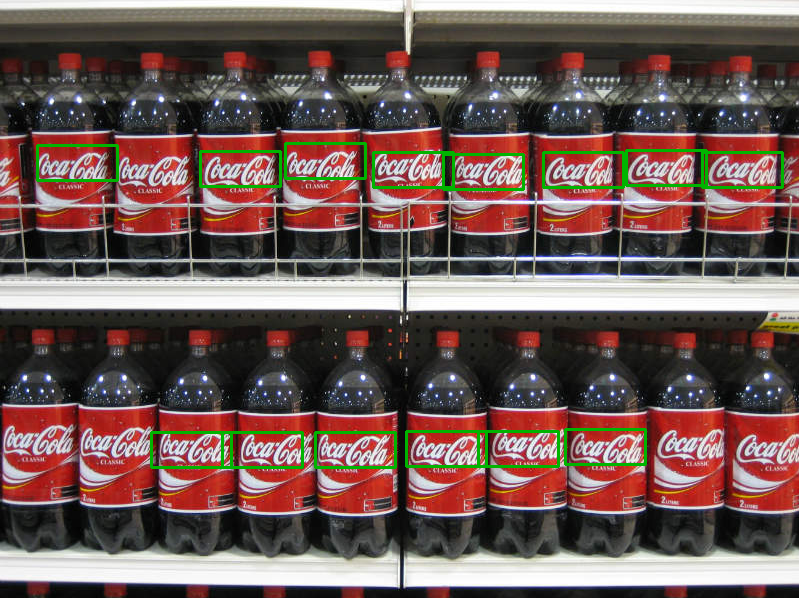

In [2]:
img_multi = cv.imread('coca_multi.png')
temp = cv.imread('pattern.png', 0)


#Preprocesamiento de las imagenes
img = cv.cvtColor(img_multi, cv.COLOR_RGB2GRAY)
img_p = cv.GaussianBlur(img, (5,5), 0)
img_p = cv.Canny(img_p, 100,200)
template = cv.GaussianBlur(temp, (5,5), 0)
template = cv.Canny(template,100,200)
scale = 0.2
temp = (cv.resize(template, None, fx=scale, fy=scale))
w, h = temp.shape[::-1]


#Puede modificar cuantas detecciones desea hacer, en la imagen hay 19 logos, pero solo logre que detecte 18.
detecciones = 14

#Loop de deteccion
for i in range(detecciones):
    #img_out = img_multi.copy()
    res = cv.matchTemplate(img_p , temp, cv.TM_CCORR_NORMED)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)


    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    #Para detectar mas de un logo tuve que cubrir de a uno los que iba detectando forzando asi a una deteccion diferente en cada loop
    cv.rectangle(img_p, top_left, bottom_right, (0, 0, 0), -1)
    cv.rectangle(img_multi, top_left, bottom_right, (0, 180, 0), 2)

cv2_imshow(img_multi)



Con este codigo logramos realizar detecciones multiples en una sola imagen y con la capacidad de elegir cuantos logos quiero detectar.